# SciPy
Библиотека [SciPy](https://scipy.github.io/devdocs/tutorial/general.html) научных вычислений для python включает:

1. поддержка специальных функций математической физики `scipy.special`;
2. вычисление интегралов и решение обыкновенных дифференциальных уравнений `scipy.integrate`;
3. решение оптимизационных задач `scipy.optimize`;
4. интерполяция `scipy.interpolate`; 
5. преобразование Фурье `scipy.fft`;
6. обработка сигналов `scipy.signal`;
7. линейная алгебра `scipy.linalg`;
8. задачи теории рероятностей и математической статистики `scipy.stats`; <br>
**...**

В этом блокноте расссмотрим некоторые примеры применения средств модуля scipy. 
Часть примеров взята из документации SciPy: https://scipy.github.io/devdocs/tutorial/general.html

## Интегрирование

*Пример.* Используя `integrate.quad()`, найдем занчение определеенного интеграла:

$$\int_{0}^{3} 2x\, dx$$

In [1]:
import numpy as np
import scipy.integrate as integrate

# integrate.quad – определенный интеграл
result = integrate.quad(lambda x: 2*x, 0, 3)
print(result)      

(9.0, 9.992007221626409e-14)


В полученном кортеже первым указано найденное значение интеграла, а на втором месте - допустимая погрешность интегрирования. Нетрудно получить только значение интеграла:

In [ ]:
print(result[0])

9.0


*Пример*. $$\int_{0}^{1} ax^2+b\, dx$$

In [ ]:
def integrand(x, a, b):
    return a*x**2 + b

a = 2
b = 1
I = integrate.quad(integrand, 0, 1, args=(a,b))
print(I)

(1.6666666666666667, 1.8503717077085944e-14)


*Пример*. Рассмотрим решение двойного интеграла с помощью `integrate.dblquad()`: $$\int_{0}^{0.5}\int_{0}^{1-2y} xy\, dx\, dy$$

In [ ]:
# Двойной интеграл. x - переменная внутреннего интеграла, y - внешнего:
area = integrate.dblquad(  
    lambda x,y:x*y,  
    0,0.5,  # Пределы внешнего (y) интеграла
    lambda x:0,lambda x:1-2*x  # Пределы внутреннего(x) интеграла
)
print(area) 

(0.010416666666666668, 4.101620128472366e-16)


###Задача 1
В качестве упражнения найдите значение двойного интеграла функции $x^2*y^2$, где $x$ - переменная внутреннего интеграла, $y$ - переменная внешнего интеграла. <br>
Пределы внешнего интеграла 1;5.<br>
Пределы внутреннего интеграла -5;5.<br>
Выведите полученное значение интеграла на экран.

In [ ]:
# Напишите свой код в данной ячейке


[Посмотреть ответ на задачу](#exercise_1)

## Решение обыкновенных дифференциальных уравнений (ОДУ)


$$\frac{dy}{dx}=f(y,x)$$

[Описание scipy.integrate.odeint в документации](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html)

### Расcмотрим пример решения ОДУ с заданным начальным условием:

$$\frac{dy}{dx} = f(y,x) = x$$

$$y(0)=y|_{x=0} = 1$$

$$y(1) = ?$$

In [ ]:
from scipy.integrate import odeint

def f(y, x):
    return x # Правая часть (ПЧ) дифференциального уравнения 

y0 = 1.0  # Начальное условие
k_step = 10000  # Количество шагов разбиения отрезка для численного интегрирования
x_output = np.linspace(0, 1, k_step)  
y_result = odeint(f, y0, x_output)
y_result = y_result[:, 0]
print(y_result)
print(y_result[-1])

x_output = np.linspace(0, 1, k_step*10 )
print(odeint(f, y0, x_output)[-1])

x_output = np.linspace(0, 1, k_step*100 )
print(odeint(f, y0, x_output)[-1])

[1.         1.00000001 1.00000002 ... 1.4998     1.4999     1.5       ]
1.5000000000000009
[1.5]
[1.5]


### Пример №  2

$$\frac{dx}{dt}=f(x,t)$$

$$f(x,t) = x$$

$$x(0)=x|_{t=0} = 1$$

$$x(1) = ?$$


In [ ]:
from scipy.integrate import odeint

def f(x, t):
    return x # ПЧ диф. ур-я

x0 = 1.0  # Начальное условие 
t_output = np.arange(0, 1+0.1, 0.1)  # Точки разбиения для численного интегрирования. Отрезок [0; 1] равномерно делиться на 11 частей
x_result = odeint(f, x0, t_output)
x_result = x_result[:, 0]
print(x_result)
print(f'Ответ: ', x_result[-1])


[1.         1.10517091 1.22140275 1.34985882 1.49182469 1.64872127
 1.8221188  2.01375273 2.22554103 2.45960316 2.7182819 ]
Ответ:  2.718281900949123


Для нахождения более точного решения попробуем отрезок [0; 1] разделить на большее количество частей (на 101 часть):

In [ ]:
t_output = np.arange(0, 1+0.01, 0.01)
print(odeint(f, x0, t_output)[-1])

[2.7182819]


Отрезок [0; 1] разделим на 1001 часть:

In [ ]:
t_output = np.arange(0, 1+0.001, 0.001)
print(odeint(f, x0, t_output)[-1])

[2.71828195]


## Статистика

### Непрерывные распределения

In [1]:
import scipy.stats  # Содержит набор стандартных распределений

from scipy.stats import norm  # Нормальное распределение

# Типичные методы работы с распределением:
print('Сгенерированная выборка:', norm.rvs(size=5))

print('Плотность вероятности:', norm.pdf(0))
print('Функция распределения:', norm.cdf(0))
print('1 - cdf, Функция хвоста распределения:', norm.sf(0)) 
print('Обратная cdf функция:', norm.ppf(0.2))
print('Обратная sf функция:', norm.isf(0.2))
print('Основные параметры распределения:', norm.stats())
print('Нецентрованные моменты k-го порядка:', norm.moment(2))

Сгенерированная выборка: [ 0.04626297 -0.68870032  0.53743806  0.34182606  1.00340786]
Плотность вероятности: 0.3989422804014327
Функция распределения: 0.5
1 - cdf, Функция хвоста распределения: 0.5
Обратная cdf функция: -0.8416212335729142
Обратная sf функция: 0.8416212335729142
Основные параметры распределения: (array(0.), array(1.))
Нецентрованные моменты k-го порядка: 1.0


Для непрерывных распределений можно задавать значения параметров `loc` и `scale` для регулирования значений распределения. Для стандратоного нормально распределения `loc` соответствует математическому ожиданию, а `scale` - среднеквадратическому отклонению.

К с.в. X применяют преобразование: `(X - loc) / scale`. Значения по умолчанию: `loc = 0` и `scale = 1`.

Сгенерируем одно значение нормального распределения с параметром `loc=10`:

In [2]:
print(f'norm.rvs(loc=10)={norm.rvs(loc=10)}')

norm.rvs(loc=10)=9.659252881349856


Объявим нормальное распределение с параметром `loc = 0` и `scale = 10` и сгенерируем 5 значений (`size=5`):


In [ ]:
rv = norm(loc=0, scale=10) # Создадим распределение с зафиксированными (frozen) параметрами
print(f'rv.rvs(size=5)={rv.rvs(size=5)}') # Для этого распределения применимы вышеописанные методы 

rv.rvs(size=5)=[ -8.86893379 -11.51221245  -7.96929823  -8.92460723   6.96476461]


Попытка изменить зафиксированный параметр приводит к ошибке:

In [ ]:
print(rv.rvs(loc=10, size=5)) 

TypeError: ignored

Модуль `scipy.stats` содержит множество полезных распределений, в том числе равномерное распределение. Переданные значения параметров `loc=-1, scale=2` обеспечат равномерное рапсределение на отрезке [-1, 1]:

In [ ]:
uniform = scipy.stats.uniform(loc=-1, scale=2)
uniform.rvs(size=10) # Генерация 100 случайных чисел

array([ 0.53824535,  0.11835066,  0.08630945,  0.52767163,  0.72985287,
        0.96524378,  0.04444168, -0.5508399 ,  0.84620392, -0.98717648])

Cвои распределения можно создать унаследовав `scipy.stats.rv_continuous` или `scipy.stats.rv_discrete` и переопределив `_pdf` или `_cdf`.
Генерация выборки этого распределения с помощью метода **rvs** будет возвращать ошибку.

In [ ]:
class MyUniform(scipy.stats.rv_continuous):
    def _pdf(self, x):
        """Плотность распределения вероятностей для
        равномерного распределения на интервале [0,1]"""
        return 1.0 if 0.0 <= x <= 1.0 else 0.0

rv = MyUniform()
print(rv.cdf(2))

0.9999999999999084


###Задача 2
В качестве упражнения сгенерируйте нормально распределенную выборку чисел из 50-и элементов и математическим ожиданием -50 <br>
Выведите полученную выборку на экран.

In [ ]:
# Напишите свой код в данной ячейке


[Посмотреть ответ на задачу](#exercise_2)

### Дискретные распределения
Создание дискретных распределений еще проще:

In [ ]:
xk = np.arange(7)
pk = (0.1, 0.2, 0.3, 0.1, 0.1, 0.0, 0.2)
my_rv = scipy.stats.rv_discrete(values=(xk, pk))

print('Энтропия:', my_rv.entropy())
print('Медиана:', my_rv.median()) 
print('Математическое ожидание:', my_rv.mean())   
print('Среднеквадратическое отклонение:', my_rv.std())

Энтропия: 1.6957425341696346
Медиана: 2.0
Математическое ожидание: 2.7
Среднеквадратическое отклонение: 1.9519221295943132


Построим графики этого распределения:

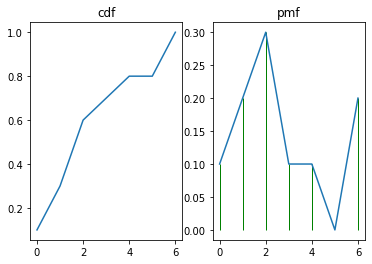

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
ax1.plot(xk, my_rv.cdf(xk)) # график функции распределения д.с.в.
ax2.plot(xk, my_rv.pmf(xk)) # график закона распредления д.с.в.
ax2.vlines(xk, 0, my_rv.pmf(xk), colors='green', lw=1)
ax1.set_title('cdf')
ax2.set_title('pmf')
plt.show()

## Оптимизация

Задача: найти вектор `x = {x1, x2, x3, x4, x5}`, обеспечивающий минимум функции Розенброка:

$$f(x)=\sum_{i=1}^{N-1} 100(x_i-x^2_{i-1})^2+(1-x_{i-1})^2$$

Используя метод Нелдера - Мида (симплекс-метод):

In [ ]:
from scipy.optimize import minimize

def rosen(x):
    """Функция Розенброка"""
    return sum(100.0*(x[1:]-x[:-1]**2.0)**2.0 + (1-x[:-1])**2.0)

print('Обратите внимание на количество итераций:')
x0 = np.array([2, 0.7, 0.8, 1.9, 1.2])
res = minimize(rosen, x0, method='nelder-m' 'ead', options={'xtol': 1e-8, 'disp': True})
print(res.x)

print()
print("Используем начальное приближение, которое сильно отличается от истинного значения:")
try_x0 = np.array([50, 0.7, 0.8, 1.9, 1.2])
res = minimize(rosen, try_x0, method='nelder-m' 'ead', options={'xtol': 1e-8, 'disp': True})
print(res.x) 

Обратите внимание на количество итераций:
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 344
         Function evaluations: 585
[1. 1. 1. 1. 1.]

Используем начальное приближение, которое сильно отличается от истинного значения:
[-0.96205135  0.93574037  0.88071506  0.7778801   0.60509681]


Используя алгоритм Broyden-Fletcher-Goldfarb-Shanno:

In [ ]:
print('Обратите внимание на количество итераций.')
def rosen_der(x): # Производная функции Розенброка
    xm = x[1:-1]
    xm_m1 = x[:-2]
    xm_p1 = x[2:]
    der = np.zeros_like(x)
    der[1:-1] = 200*(xm-xm_m1**2) - 400*(xm_p1 - xm**2)*xm - 2*(1-xm)
    der[0] = -400*x[0]*(x[1]-x[0]**2) - 2*(1-x[0])
    der[-1] = 200*(x[-1]-x[-2]**2)
    return der

res = minimize(rosen, x0, method='BFGS', jac=rosen_der, options={'disp': True})
print(res.x)

Обратите внимание на количество итераций.
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 32
         Function evaluations: 41
         Gradient evaluations: 41
[0.99999995 0.99999989 0.9999998  0.99999963 0.99999928]


**Метод наименьших квадратов для нахождения значений параметров.**

Пусть $f_i(x)$ – гладкие функции.

Пример из [документации](https://scipy.github.io/devdocs/tutorial/optimize.html#least-squares-minimization-least-squares):

Найти истиные значения параметров $x=(x_0,x_1,x_2,x_3)^T$, обеспечивающих минимум отклонению значений функции от экспериментальных данных:

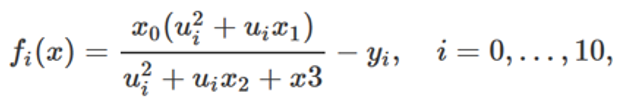

где $y_i$ – экспериментальные данные, которые получены при фиксированных (известных) значениях независимых переменных $u_i$.

Матрицу Якоби для функций $f_i(x)$: 

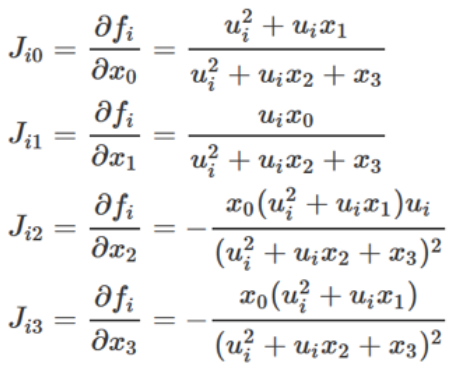

И пусть значения параметров ограничены: $0 \le x_j \le 100, j=0,1,2,3$

`ftol` termination condition is satisfied.
Function evaluations 131, initial cost 4.4383e+00, final cost 1.5375e-04, first-order optimality 4.52e-08.

Найденные значения x:[0.192806   0.19130332 0.12306046 0.13607205]

 График функции с найденными оптимальными значениями параметров x


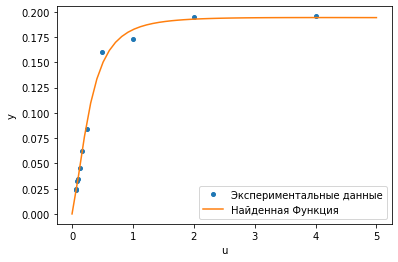

In [ ]:
from scipy.optimize import least_squares

def model(x, u):
    '''
    Заданная гладкая функция
    '''
    return x[0] * (u ** 2 + x[1] * u) / (u ** 2 + x[2] * u + x[3])

def fun(x, u, y):
    '''
    Отклонения расчитанных значений и экспериментальных данных
    '''
    return model(x, u) - y

def jac(x, u, y):
    '''
    Нахождение Якобиана
    '''
    J = np.empty((u.size, x.size))
    den = u ** 2 + x[2] * u + x[3]
    num = u ** 2 + x[1] * u
    J[:, 0] = num / den
    J[:, 1] = x[0] * u / den
    J[:, 2] = -x[0] * num * u / den ** 2
    J[:, 3] = -x[0] * num / den ** 2
    return J

u = np.array([4.0, 2.0, 1.0, 5.0e-1, 2.5e-1, 1.67e-1, 1.25e-1, 1.0e-1,8.33e-2, 7.14e-2, 6.25e-2])
y = np.array([1.957e-1, 1.947e-1, 1.735e-1, 1.6e-1, 8.44e-2, 6.27e-2,4.56e-2, 3.42e-2, 3.23e-2, 2.35e-2, 2.46e-2])

# Bектор начальных значений x:
x0 = np.array([2.5, 3.9, 4.15, 3.9])
res = least_squares(fun, x0, jac=jac, bounds=(0, 100), args=(u, y), verbose=1)

print(f'\nНайденные значения x:{res.x}')


print("\n График функции с найденными оптимальными значениями параметров x")
import matplotlib.pyplot as plt
u_test = np.linspace(0, 5)
y_test = model(res.x, u_test)
plt.plot(u, y, 'o', markersize=4, label='Экспериментальные данные')
plt.plot(u_test, y_test, label='Найденная Функция')
plt.xlabel("u")
plt.ylabel("y")
plt.legend(loc='lower right')
plt.show()

## Интерполяция

### 1d интерпляция

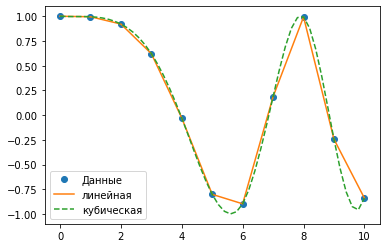

In [ ]:


from scipy.interpolate import interp1d

x = np.linspace(0, 10, num=11, endpoint=True)  # Точки для интерполяции
y = np.cos(-x**2/10.0)  # Значения функции в точках x

fun_l = interp1d(x, y)  # Вызываем линейную интерполяцию
fun_c = interp1d(x, y, kind='cubic')  # Вызываем кубическую интерполяцию

x_new = np.linspace(0, 10, num=51, endpoint=True)  # Новые точки x

import matplotlib.pyplot as plt
plt.plot(x, y, 'o', x_new, fun_l(x_new), '-', x_new, fun_c(x_new), '--')
plt.legend(['Данные', 'линейная', 'кубическая'], loc='best')
plt.show()

### 2d интерпляция

Вспомним как работает np.mgrid() :
- При комплексном последнем аргументе `5j` отрезок [0, 10] делится на 5 равных частей
- Вещественный последний аргумент задает шаг деления отрезка, правая граница отрезка не включается

In [ ]:
print(np.mgrid[0:10:5j])  
print(np.mgrid[0:10:2]) 

[ 0.   2.5  5.   7.5 10. ]
[0 2 4 6 8]


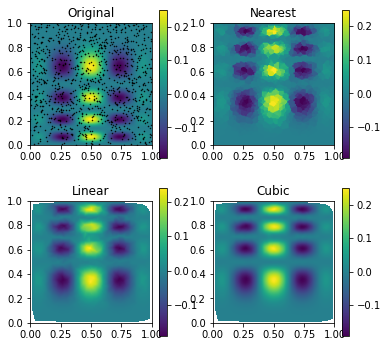

In [ ]:
from scipy.interpolate import griddata

def fun(x, y):
    return x*(1-x)*np.cos(4*np.pi*x) * np.sin(4*np.pi*y**2)**2

grid_x, grid_y = np.mgrid[0:1:100j, 0:1:200j]

# Пусть известны значения только в 1000 точках:
points = np.random.rand(1000, 2)  # 1000 строк, 2 столбца
values = fun(points[:,0], points[:,1]) 

# Находим результаты различных методов интерполяции:
grid_z0=griddata(points, values, (grid_x, grid_y), method='nearest')
grid_z1=griddata(points, values, (grid_x, grid_y), method='linear')
grid_z2=griddata(points, values, (grid_x, grid_y), method='cubic')

# Результаты интерполяции примерно одинаковы для всех методов. 
# Наилучший результат получен при кубической интерполяции.

plt.subplot(221)
plt.imshow(fun(grid_x, grid_y).T, extent=(0,1,0,1))  # extent=(0,1,0,1)- масштабирование: шкала x и y от 0 до 1
plt.colorbar() # шкала значений функции
plt.plot(points[:,0], points[:,1], 'k.', ms=1)
plt.title('Original')
plt.subplot(222)
plt.imshow(grid_z0.T, extent=(0,1,0,1), origin='lower')
plt.colorbar()
plt.title('Nearest')
plt.subplot(223)
plt.imshow(grid_z1.T, extent=(0,1,0,1), origin='lower')
plt.colorbar()
plt.title('Linear')
plt.subplot(224)
plt.imshow(grid_z2.T, extent=(0,1,0,1), origin='lower')
plt.colorbar()
plt.title('Cubic')
plt.gcf().set_size_inches(6, 6)
plt.show()

### Сплайн-интерполяция

На полученом графике не видно линию кубического сплайна, т.к. она совпадает с графиком функции


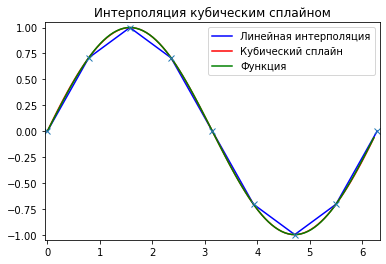

In [ ]:
from scipy import interpolate

x = np.arange(0, 2*np.pi+np.pi/4, 2*np.pi/8)  # Задаем 9 точек, в которых найдем значение функции:
y = np.sin(x)

# Инициируем интерполяцию, s – коэффициент сглаживания
tck = interpolate.splrep(x, y, s=0)  

# Задаем новые точки x_new 
x_new = np.arange(0, 2*np.pi, np.pi/50)

# Получаем значения в x_new. tck - указан выше. der - порядок производной при вычислении сплайна
y_new = interpolate.splev(x_new, tck, der=0)  

print('На полученом графике не видно линию кубического сплайна, т.к. она совпадает с графиком функции')
plt.figure()
plt.plot(x, y, 'b', x_new, y_new, 'r', x_new, np.sin(x_new), 'g', x, y, 'x')
plt.legend(['Линейная интерполяция', 'Кубический сплайн', 'Функция'])
plt.axis([-0.05, 6.33, -1.05, 1.05])
plt.title('Интерполяция кубическим сплайном')
plt.show()

### Задача 3
Постройте интерполяцию для функции $y=x**2-5$ на отрезке от -3 до 3 с выбранным вами количеством точек. <br>
Постройте график функции и сравните с получившейся интерполяцией.

In [ ]:
# Напишите свой код в данной ячейке


[Посмотреть ответ на задачу](#exercise_3)

# Ответы на задания

<a name="exercise_1"></a>
## Ответ на задачу 1 (нахождение двойного интеграла)

In [ ]:
import scipy.integrate as integrate
area = integrate.dblquad(  # Двойной интеграл
    lambda x,y:x**2*y**2,  # x - переменная внутреннего интеграла, y - внешнего
    1,5,  # Пределы внешнего(y) интеграла
    -5,5  # Пределы внутреннего(x) интеграла
)
print(area[0])

3444.444444444445


<a name="exercise_2"></a>
## Ответ на задачу 2 

In [ ]:
import scipy.stats
from scipy.stats import norm
seq = norm.rvs(size=50, loc=-50)
print(seq)

[-47.80678211 -49.66803935 -49.7770274  -50.70865235 -49.79068238
 -49.01619501 -48.81543264 -49.69733441 -50.90226188 -49.64451091
 -49.28470548 -49.77939413 -50.55410373 -49.43164462 -51.20351691
 -49.81250816 -48.82081151 -52.16229577 -48.01245624 -49.83972921
 -49.72232516 -52.14150775 -48.45115809 -50.18313768 -49.66187812
 -49.02787639 -49.68022016 -51.33558353 -50.10033883 -49.70837935
 -49.90265936 -49.04993365 -50.82700806 -52.42025332 -50.90754961
 -50.67404682 -51.2861985  -49.27104433 -50.89602049 -49.62064118
 -50.61725804 -50.37625459 -51.19759687 -50.72221099 -50.07556432
 -49.24123158 -52.40762896 -51.452328   -49.55216197 -50.37700735]


<a name="exercise_3"></a>
## Ответ на задачу 3 

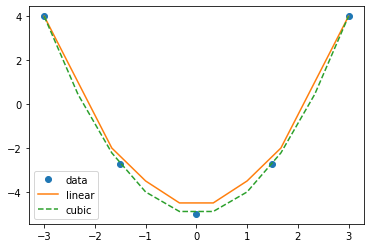

In [ ]:
from scipy.interpolate import interp1d
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-3, 3, num=5, endpoint=True)
y = x**2-5
f = interp1d(x, y)
f2 = interp1d(x, y, kind='cubic')

xnew = np.linspace(-3, 3, num=10, endpoint=True)
import matplotlib.pyplot as plt
plt.plot(x, y, 'o', xnew, f(xnew), '-', xnew, f2(xnew), '--')
plt.legend(['data', 'linear', 'cubic'], loc='best')
plt.show()